<a href="https://colab.research.google.com/github/Bagautdino/LAB1/blob/main/Laboratory_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 0 (1 балл)

Данные, которые нужно использовать для выполнения задания, возьмите [здесь](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data).

Данные расположены в двух таблицах: **penguins_iter** и **penguins_size**. Для этой лабораторной работы вам понадобится только таблица **penguins_size**.

**penguins_size** содержит следующую информацию:
* `species`: вид, к которому относится пингвин
* `culmen_length_mm`: длина клюва
* `culmen_depth_mm`: глубина клюва
* `flipper_length_mm`: длина ласт
* `body_mass_g`: масса тела
* `island`: название острова, на котором пингвин обитает
* `sex`: пол пингвина



1. Загрузите файл с данными к себе на Гугл диск и подключите его в Google Colab через `mount.drive`.
2. Выведите общую статистику по всем числовым и нечисловым столбцам с помощью функции `describe()`.
3. Узнайте размеры датасета с помощью функции `shape`.
4. Выведите 4 первые строки датасета.

In [31]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
df = pd.read_csv("/content/drive/MyDrive/penguins_size.csv")
df.describe(include='all') 


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [33]:
df.shape

(344, 7)

In [34]:
df.head(4)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


# Задание 1 (1 балл)

1. Узнайте, сколько видов пингвинов представлено в таблице.
2. Посчитайте долю пингвинов каждого вида.
3. Выведите количество пингвинов, обитающих на каждом из островов.

In [35]:
df['species'].nunique()

3

In [36]:
df['species'].value_counts(normalize=True)

Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: species, dtype: float64

In [37]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

# Задание 2 (1 балл)

1. Найдите id пингвина с самым длинным клювом и с самым коротким. Выведите всю информацию о каждом из этих пингвинов в виде одной таблицы.
2. Посчитайте, насколько самый длинный клюв длиннее самого короткого.

In [38]:
#id у пингвина с малейшим клювом
min_id = df['culmen_length_mm'].idxmin()
#id у пингвина с длиннейшим клювом
max_id = df['culmen_length_mm'].idxmax()
df.iloc[[min_id, max_id]]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
142,Adelie,Dream,32.1,15.5,188.0,3050.0,FEMALE
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE


In [39]:
difference = df['culmen_length_mm'].max() - df['culmen_length_mm'].min()
difference

27.5

# Задание 3 (1 балл)

1. Постройте корреляционную матрицу для значений столбцов `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`. 
2. Результат покажите на тепловой карте (heatmap).

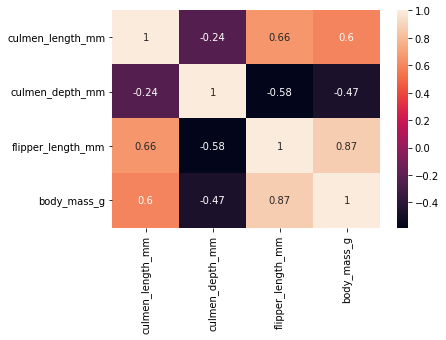

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
corr_matrix = df[['culmen_length_mm', 'culmen_depth_mm',
'flipper_length_mm', 'body_mass_g']].corr()
corr_matrix
sns.heatmap(corr_matrix, annot = True)

# Задание 4 (2 балла)

1. О пингвинах какого вида в таблице больше всего недостающих данных? (Строк с `NaN`)
2. Какой информации о пингвинах чаще всего не хватает?

In [41]:
df.isnull().groupby([df['species']]).sum().sum(axis=1).idxmax()

'Adelie'

In [42]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [43]:
df.isna().sum().idxmax()

'sex'

# Задание 5 (2 балла)

1. По данным из таблицы узнайте, равномерно ли демографиески (процент мужских и женских особей) пингвины распределены по каждому из островов. Считаем, что равномерно, если разница составляет не более 3%.
2. Результат покажите на столбиковой диаграмме.

Количество женских и мужских особей по островам:

In [44]:
df_clear = df[df.sex != '.']
is_sex = df_clear.groupby(['island', 'sex'])
is_sex.size()

island     sex   
Biscoe     FEMALE    80
           MALE      83
Dream      FEMALE    61
           MALE      62
Torgersen  FEMALE    24
           MALE      23
dtype: int64

Разница между женскими и мужскими особями на каждом острове:

In [45]:
d = {}

def f(x):
  island = x.iloc[0]['island']
  if island not in d:
    d[island] = {'Female': x.shape[0]}
  else:
    d[island]['Male'] = x.shape[0]

is_sex.apply(f)

difference = {}
for key, val in d.items():
  female_part = val['Female']/(val['Female']+val['Male']) * 100
  male_part = 100 - female_part
  difference[key] = round(abs(male_part - female_part),3)

difference

{'Biscoe': 1.84, 'Dream': 0.813, 'Torgersen': 2.128}

Равномерность демографического распределения пингвинов(difference<=3)

In [46]:
{key: val <= 3 for key, val in difference.items()}

{'Biscoe': True, 'Dream': True, 'Torgersen': True}

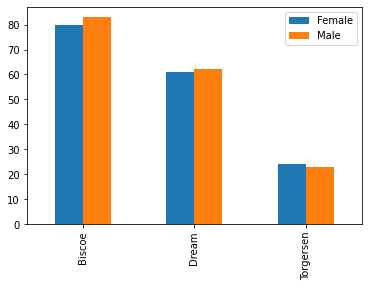

In [47]:
new_is_sex = pd.DataFrame(d).T
new_is_sex.plot.bar()

# Задание 6 (2 балла)

1. Считая, что длина ласт пингвина составляет треть его роста, рассчитайте индекс массы тела каждого пингвина. Определите самый крупный вид.
2. В каком количестве популяция этого вида представлена на каждом из островов? Результат покажите на круговой диаграмме.

In [48]:
mass_df = df.copy()
mass_df['height_mm'] = mass_df['flipper_length_mm']*3
mass_df['mass_index'] = mass_df['body_mass_g']*10e-3/(mass_df['height_mm']*10e-3)**2
mass_df['mass_index']
specie = mass_df.groupby(['species'])['mass_index'].mean().idxmax()
specie

'Gentoo'

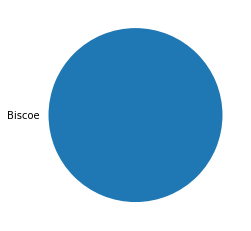

In [49]:
island_specie = mass_df[mass_df['species'] == specie].groupby(['island']).size()
island_specie.name = ''
island_specie.plot.pie()